In [1]:
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os
import math

In [20]:
filtered_df = pd.read_csv("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP_filtered/WT_01.csv")
prepared_df = pd.read_csv("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/data_prep/EDP_WT_01.csv")
raw_df = pd.read_csv("/home/ujx4ab/ondemand/dissecting_dist_inf/WF_Data/EDP/EDP_Model_Testing/EDP/WT_01.csv")

In [18]:
def visualize_missing_data(df, df_name): 
    missing_data_check_df = df.copy()
    missing_data_check_df['Timestamp'] = pd.to_datetime(missing_data_check_df['Timestamp'])
    missing_data_check_df.set_index('Timestamp', inplace=True)
    complete_range = pd.date_range(start=missing_data_check_df.index.min(), end=missing_data_check_df.index.max(), freq='10min')
    missing_timestamps = complete_range.difference(missing_data_check_df.index)
    
    if df_name == "raw_df": 
        power = 'Prod_LatestAvg_TotActPwr'
    else: 
        power = 'Power'
    
    nan_powers = missing_data_check_df[missing_data_check_df[power].isna()].index

    print("Total expected timestamps: ", len(complete_range))
    print("Total missing timestamps: ", len(missing_timestamps))
    print("Total nan data entries: ", len(nan_powers))

    plt.figure(figsize=(15, 6))
    plt.plot(complete_range, [1] * len(complete_range), '|', color='blue', markersize=10, label='Expected Timestamps')

    if len(missing_timestamps) > 0:
        plt.plot(missing_timestamps, [1] * len(missing_timestamps), '|', color='red', markersize=10, label='Missing Timestamps')

    if len(nan_powers) > 0:
        plt.plot(nan_powers, [1] * len(nan_powers), '|', color='yellow', markersize=10, label='Missing Power Values')

    plt.xlabel('Timestamp')
    plt.ylabel('Presence Indicator')
    plt.title(f'{df_name} Missing Timestamps (10-Minute Intervals)')
    plt.legend()
    plt.show()

In [8]:
def check_zero_features_zero_wind(df, df_name, cols_of_interest): 
    print(f"checking for {df_name} missing data ...")
    for col in cols_of_interest:
        zero_col_with_wind = (filtered_df[col] == 0) & (filtered_df["Wind_speed"] > 4.5)

--------------------------------------------------
checking for raw_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  593
Total nan data entries:  0


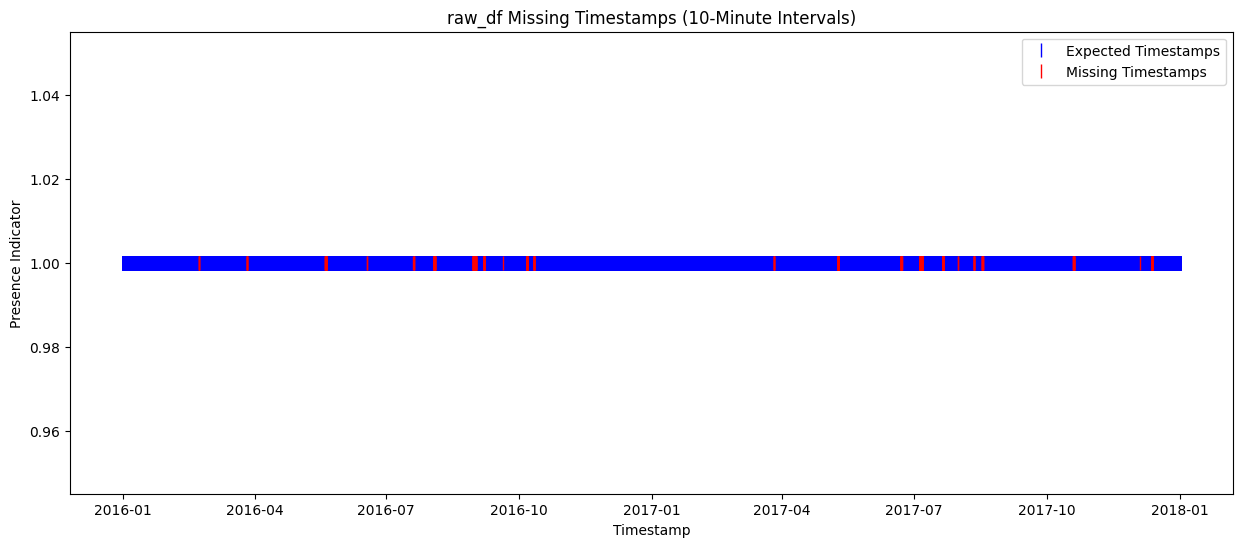

--------------------------------------------------
--------------------------------------------------
checking for filtered_df missing data ...
Total expected timestamps:  105264
Total missing timestamps:  0
Total nan data entries:  7122


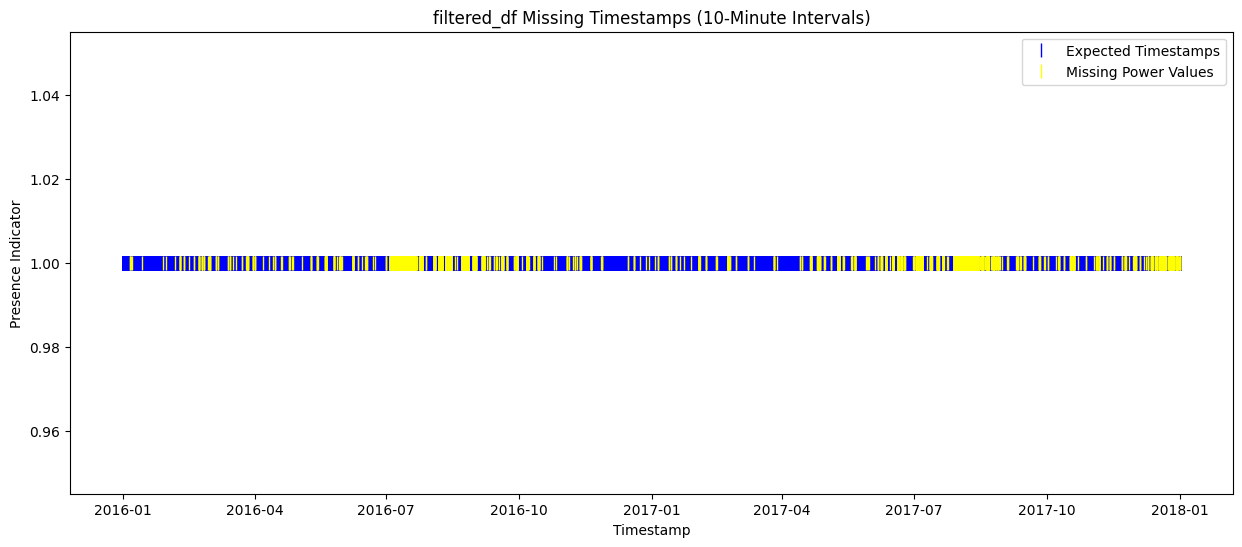

--------------------------------------------------
--------------------------------------------------
checking for prepared_df missing data ...
Total expected timestamps:  105261
Total missing timestamps:  0
Total nan data entries:  5333


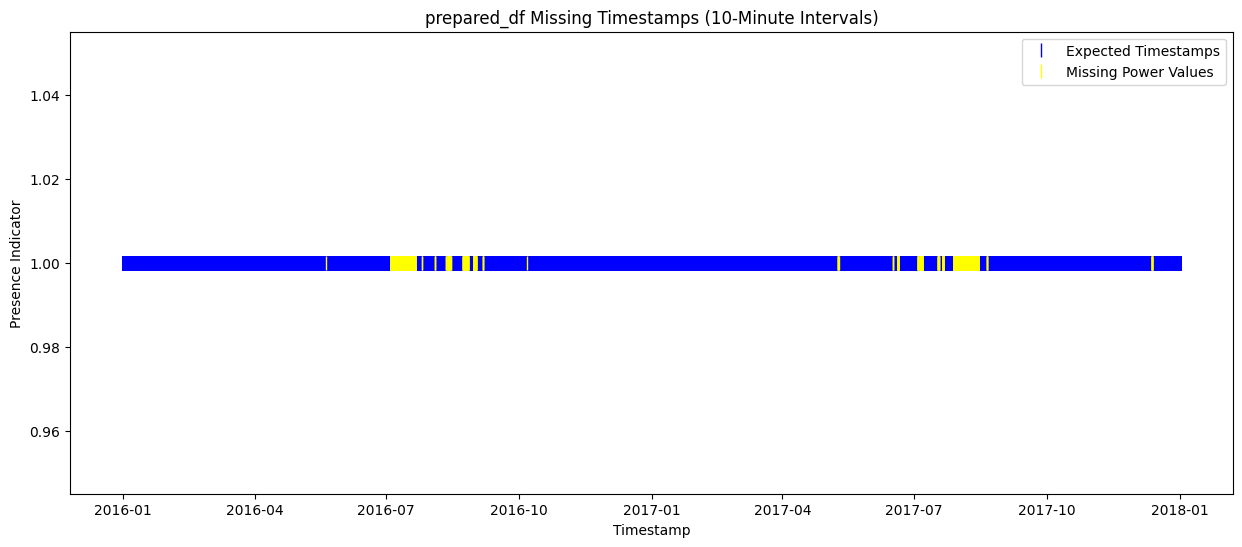

--------------------------------------------------


In [21]:
dfs = [raw_df, filtered_df, prepared_df]
df_names = ["raw_df", "filtered_df", "prepared_df"]
cols_of_interest = (['Gen_speed', 'Gen_speed_std', 'Rotor_speed', 'Rotor_speed_std', 'Power'])

for df, df_name in zip(dfs, df_names): 
    print("-" * 50)
    check_zero_features_zero_wind(df, df_name, cols_of_interest)
    visualize_missing_data(df, df_name)
    print("-" * 50)

In [ ]:
filtered_df['Timestamp'] = pd.to_datetime(filtered_df['Timestamp'])

# Extract Month from the timestamp
filtered_df['Month'] = filtered_df['Timestamp'].dt.month

# Map months to seasons
seasons_dict = {
    1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
    11: 'Autumn', 12: 'Winter'
}
filtered_df['Seasons'] = filtered_df['Month'].map(seasons_dict)

# Extract Hour from the timestamp
filtered_df['Hour'] = filtered_df['Timestamp'].dt.hour + 1
pd.set_option('display.max_columns', None)

In [28]:
filtered_df.columns
#Intialize Numerical and Date Columns
date_col=['Month','Seasons','Hour']
# num_col= ['timestamp', 'ambient_temperature', 'wind_relative_direction', 'wind_speed', 'total_active_power', 'generator_rpm', 'rotor_rpm', 'gearbox_temp_bin', 'pitch_angle_bin', 'gearbox_oil_temp']
num_col = ['timestamp', 'Wind_speed', 'Wind_speed_std', 'Wind_rel_dir', 'Amb_temp',
       'Gen_speed', 'Gen_speed_std', 'Rotor_speed', 'Rotor_speed_std',
       'Blade_pitch', 'Blade_pitch_std', 'Gen_phase_temp_3', 'Transf_temp_p1',
       'Transf_temp_p2', 'Transf_temp_p3', 'Gen_bearing_temp_1',
       'Gen_bearing_temp_2', 'Hyd_oil_temp', 'Gear_oil_temp', 'Gear_bear_temp',
       'Nacelle_position', 'Power']

In [13]:
filtered_df[num_col].hist(bins=20,figsize=(12,8))

NameError: name 'num_col' is not defined

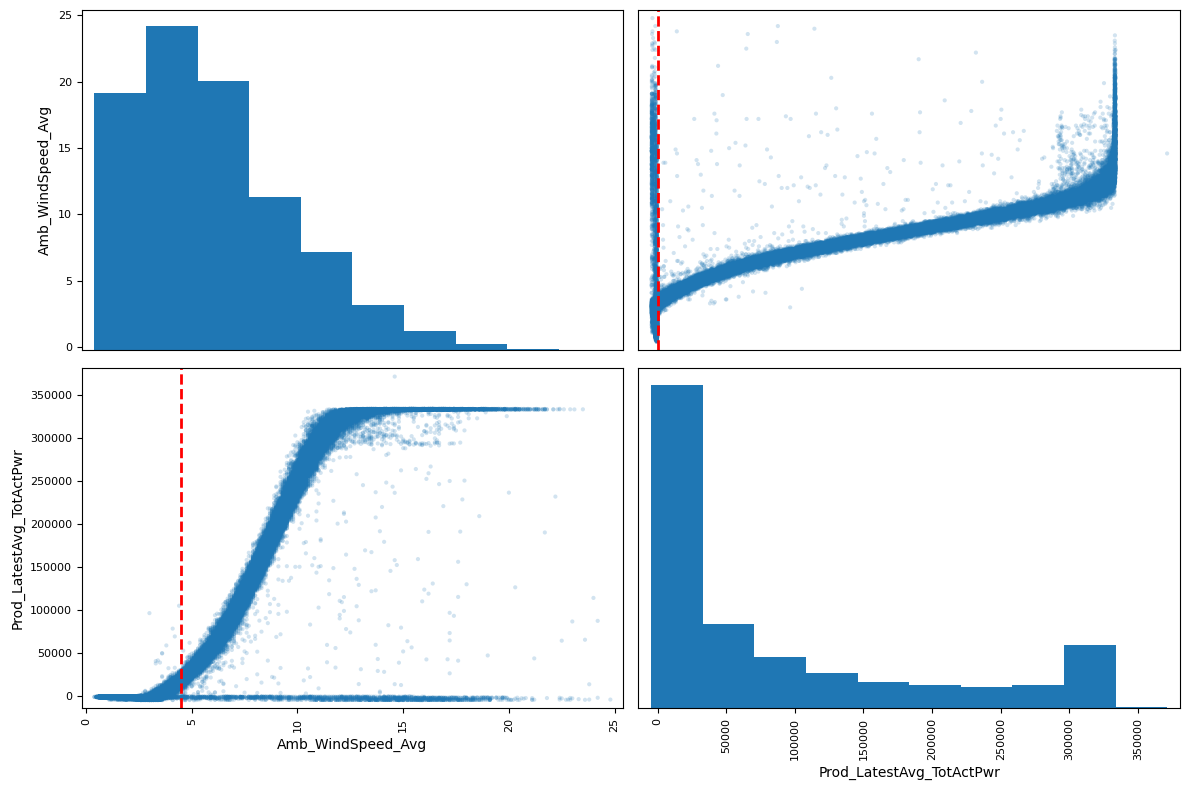

In [19]:
num_col = ['Amb_WindSpeed_Avg', 'Prod_LatestAvg_TotActPwr']

# Create the scatter matrix
scatter_matrix_fig = pd.plotting.scatter_matrix(raw_df[num_col], alpha=0.2, figsize=(12, 8))

# Define vertical line value
vertical_line_value = 4.5  

# Iterate over the scatter plots (off-diagonal)
for i in range(len(num_col)):
    for j in range(len(num_col)):
        if i != j:  # Avoid diagonal histograms
            ax = scatter_matrix_fig[i, j]  # Get the scatter plot axis
            ax.axvline(vertical_line_value, color='red', linestyle='--', linewidth=2)  # Add vertical line

plt.tight_layout()
plt.show()

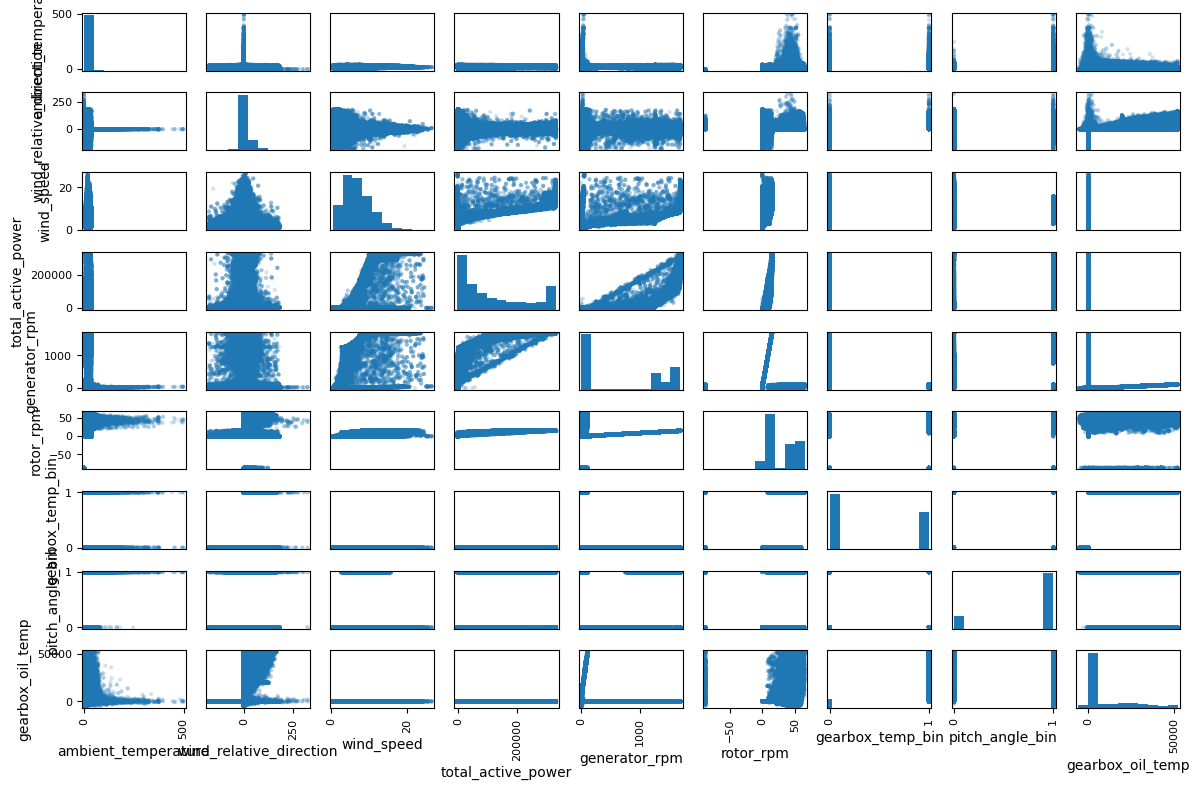

In [10]:
pd.plotting.scatter_matrix(filtered_df[num_col], alpha=0.2, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [26]:
filtered_df.rename(columns={'Timestamp': 'timestamp'}, inplace=True)

In [27]:
filtered_df.columns

Index(['timestamp', 'Wind_speed', 'Wind_speed_std', 'Wind_rel_dir', 'Amb_temp',
       'Gen_speed', 'Gen_speed_std', 'Rotor_speed', 'Rotor_speed_std',
       'Blade_pitch', 'Blade_pitch_std', 'Gen_phase_temp_3', 'Transf_temp_p1',
       'Transf_temp_p2', 'Transf_temp_p3', 'Gen_bearing_temp_1',
       'Gen_bearing_temp_2', 'Hyd_oil_temp', 'Gear_oil_temp', 'Gear_bear_temp',
       'Nacelle_position', 'Power'],
      dtype='object')

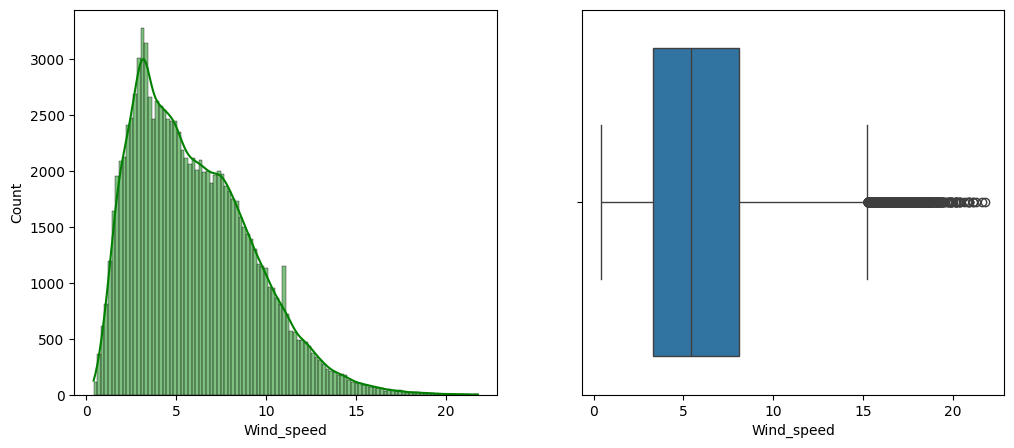

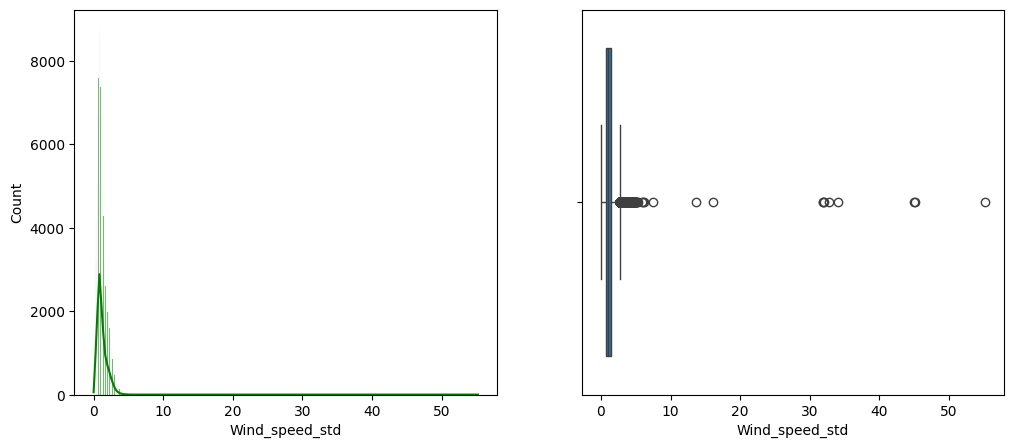

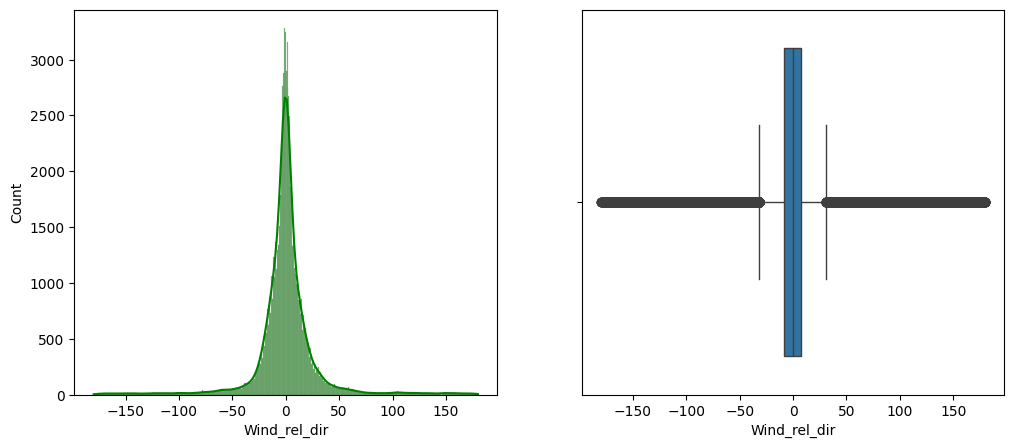

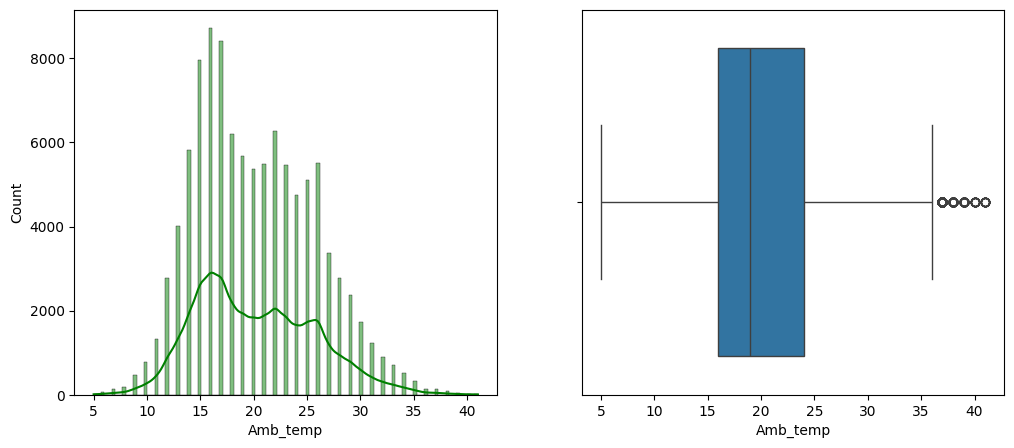

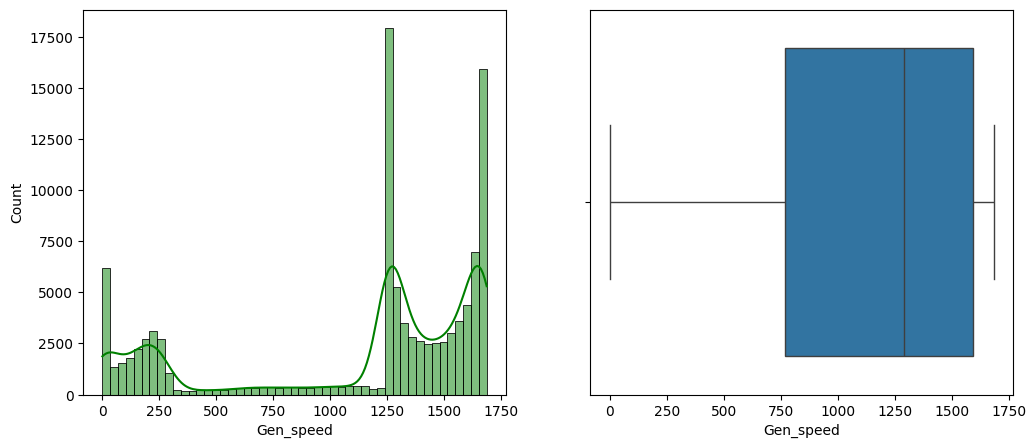

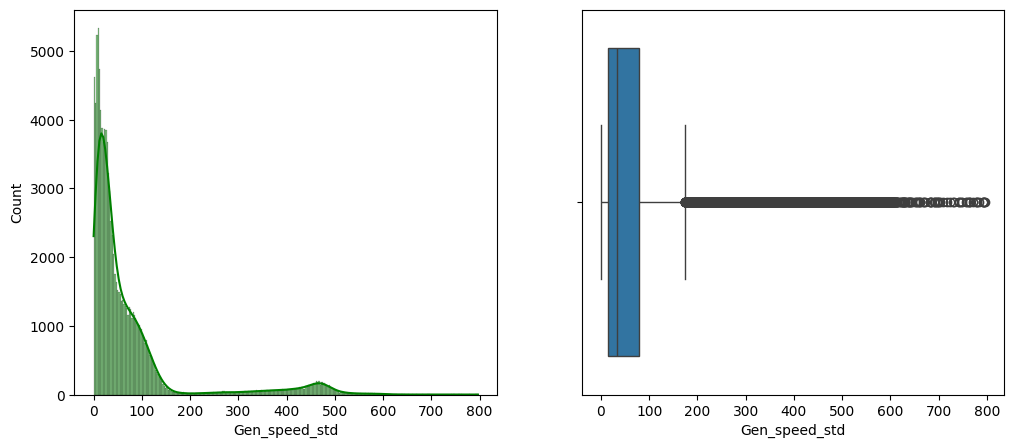

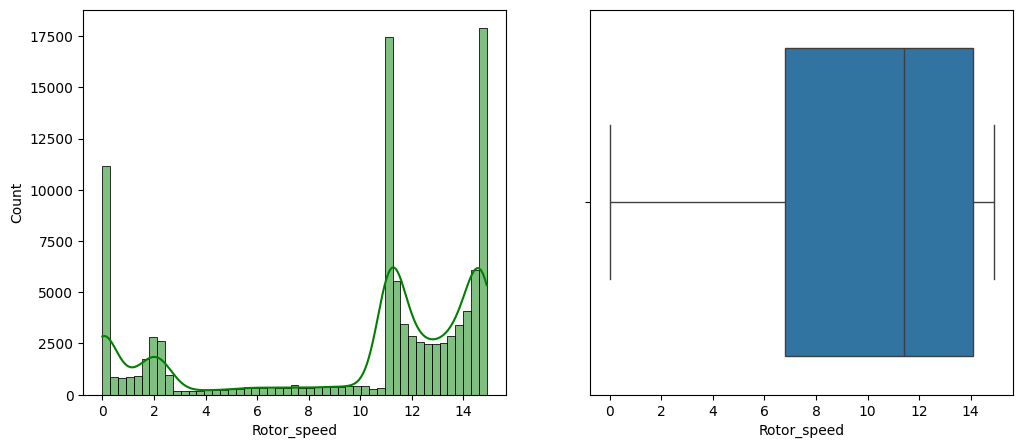

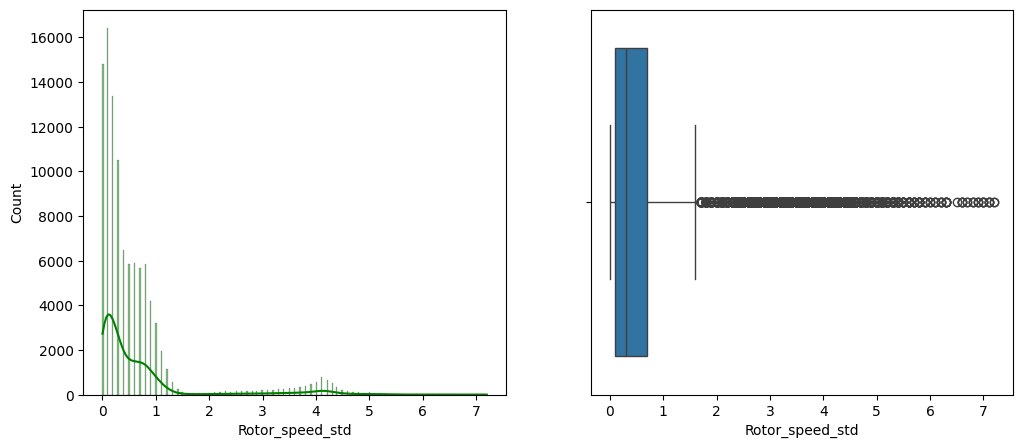

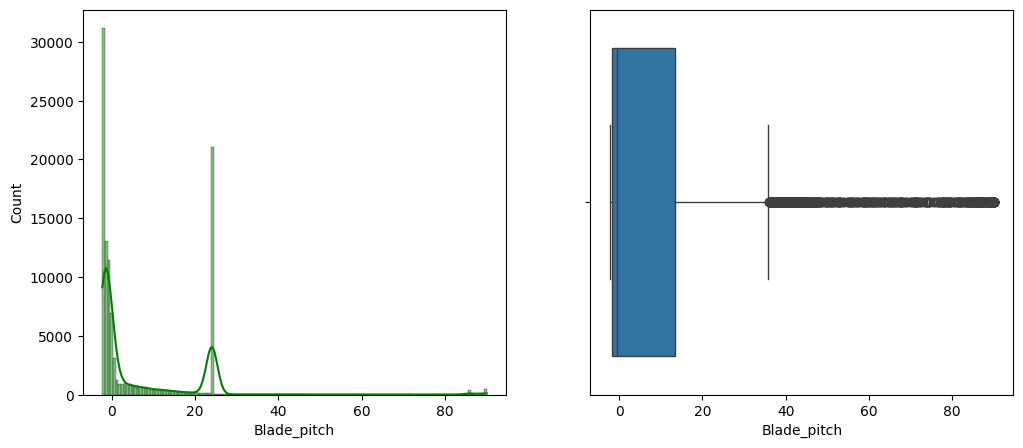

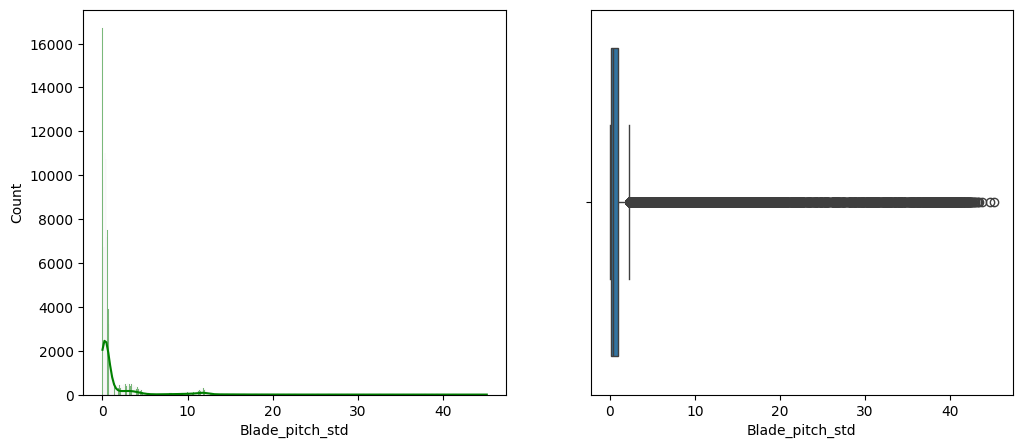

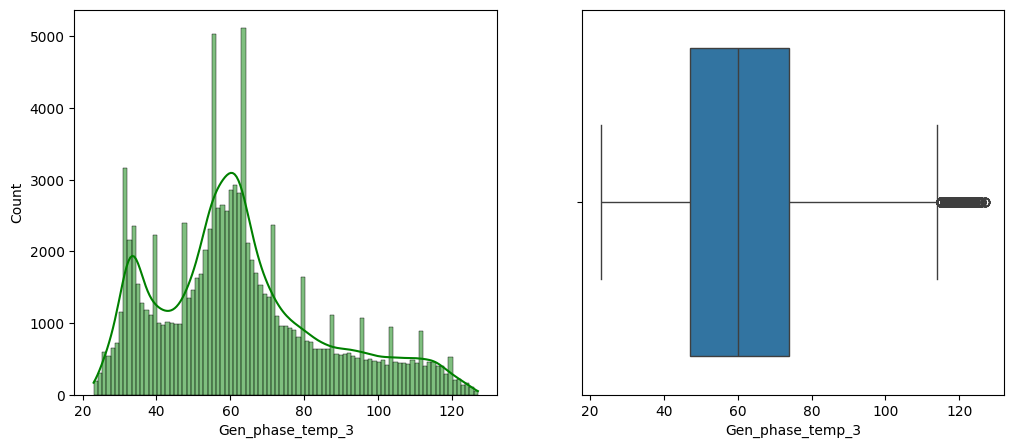

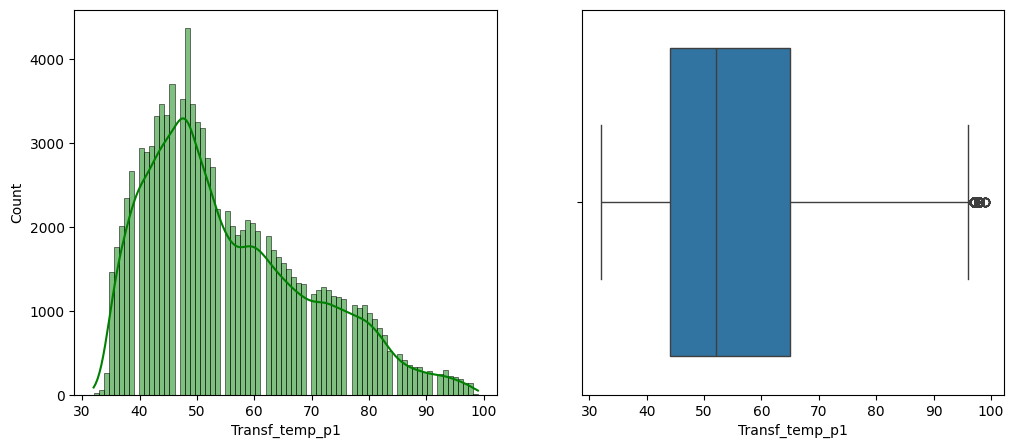

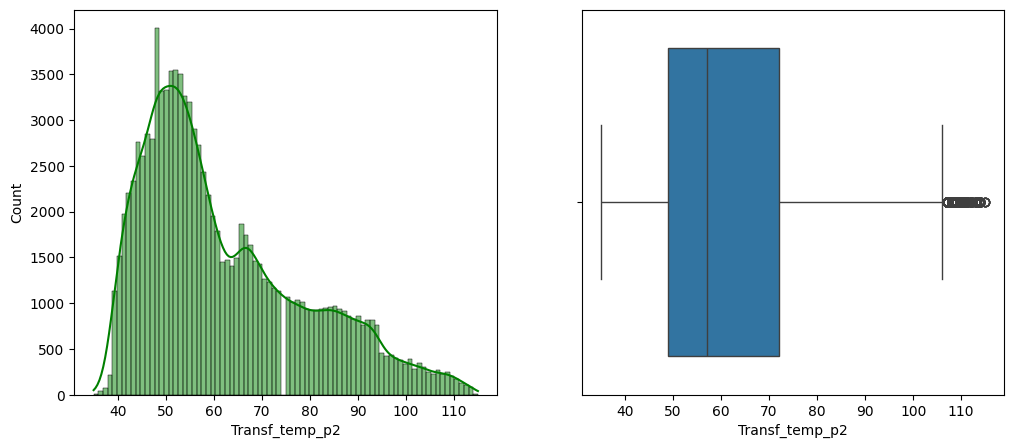

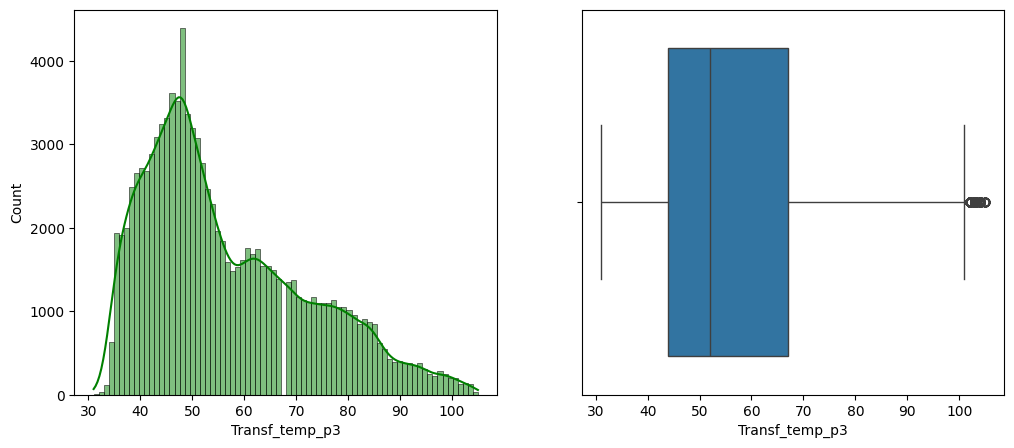

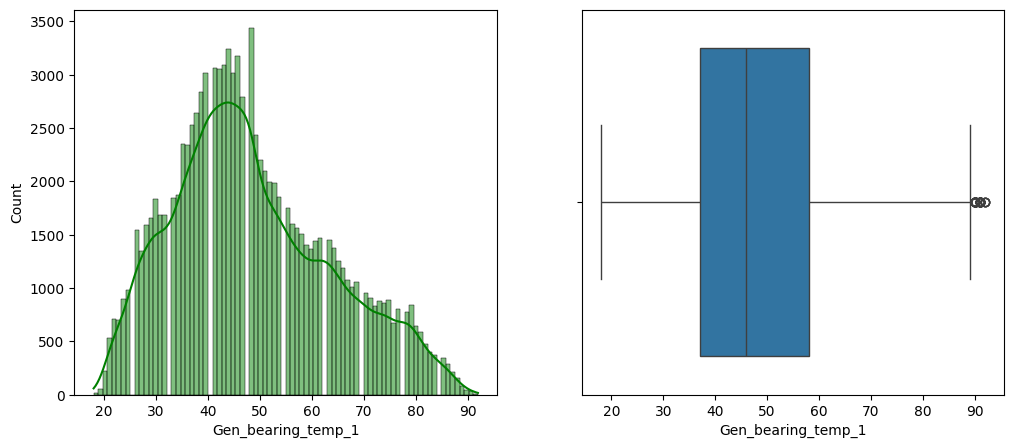

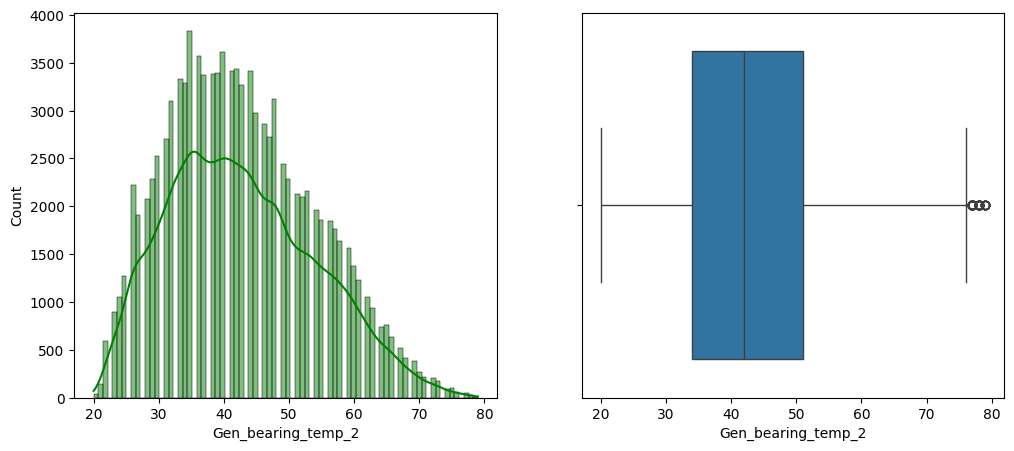

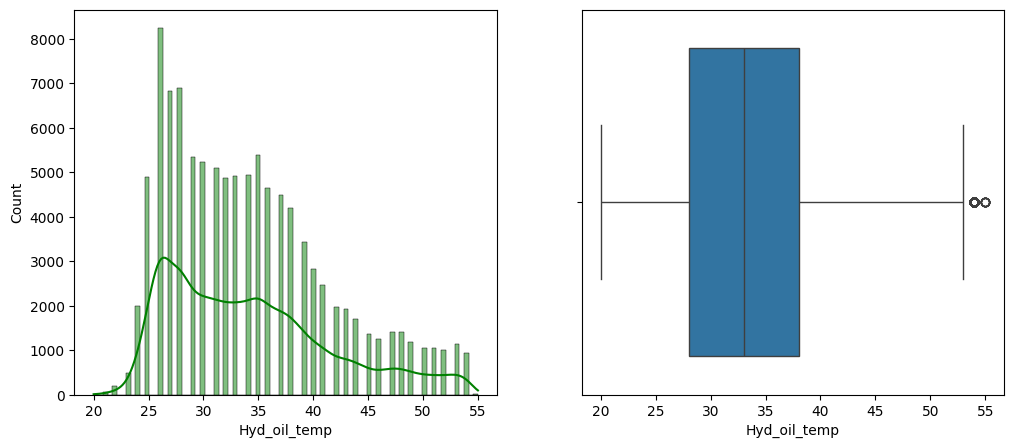

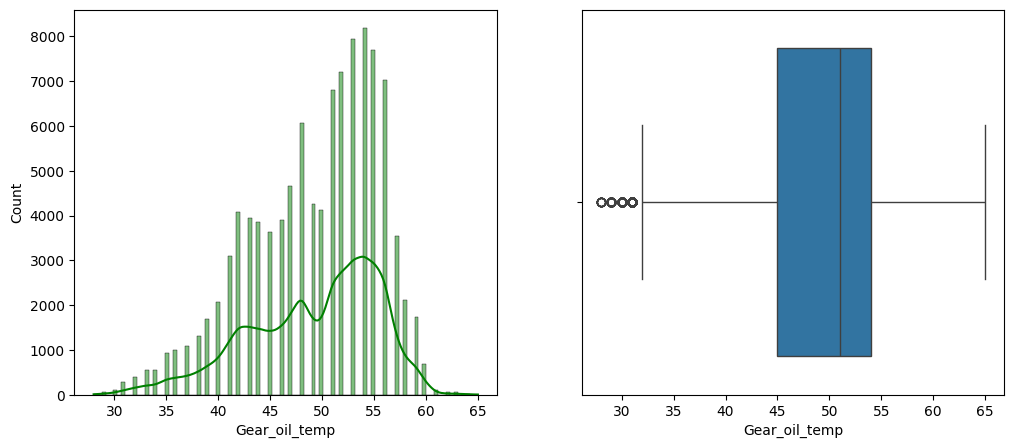

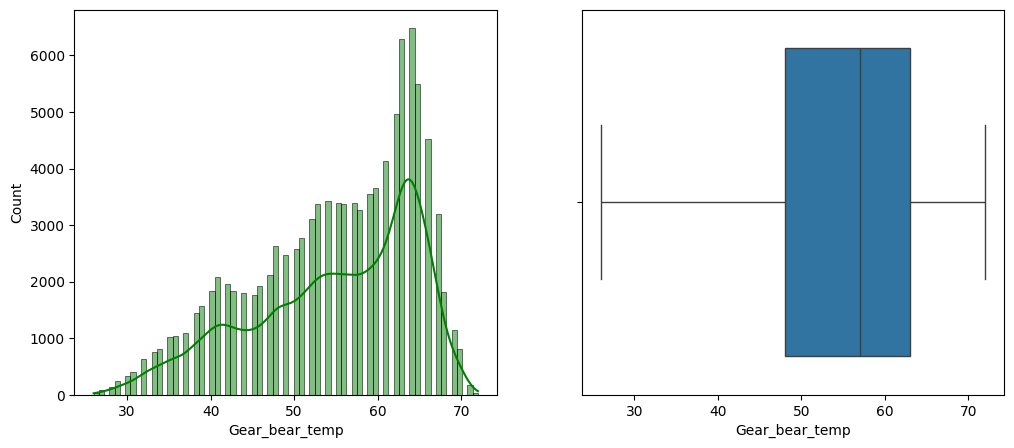

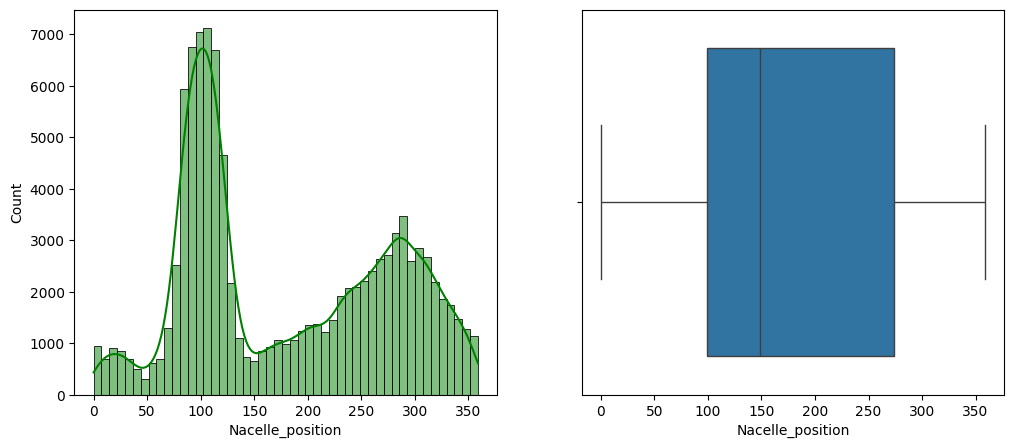

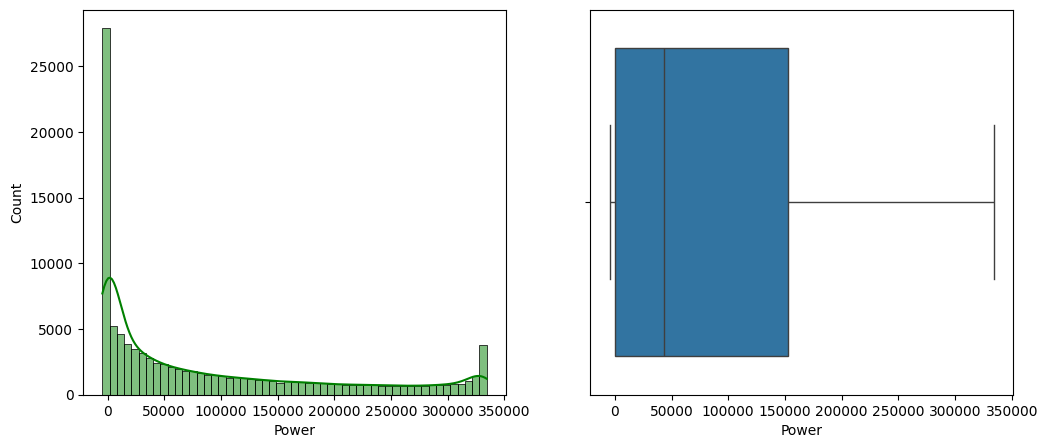

In [32]:
for col in num_col:
    if col == "timestamp": continue
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(filtered_df[col], kde=True, ax=ax[0], color='green')
    sns.boxplot(x=filtered_df[col], ax=ax[1])
    plt.show()

In [ ]:
corr = filtered_df[num_col].corr(numeric_only=True)
mask = np.triu(corr)
mask=mask
plt.figure(figsize=(12, 6))
plt.title('Colinear Relation between Numerical Columns')
sns.heatmap(corr, annot=True,mask=mask, fmt='.2f')
sns.color_palette("magma", as_cmap=True)
plt.show()

In [ ]:
def create_num_col_vs_date_col(date_col, num_col): 
    for date in date_col:
        num_rows = math.ceil(len(num_col) / 2)  # Round up to ensure enough rows
        fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 8))
        axes = axes.flatten()
        for idx, numeric_feature in enumerate(num_col):
            sns.barplot(
                x=date, 
                y=numeric_feature, 
                data=filtered_df, 
                ax=axes[idx], 
                errorbar=None, 
                palette='rocket'
            )
        for i in range(len(num_col), len(axes)):
            fig.delaxes(axes[i])

        fig.suptitle(f'Numerical Columns over the {date}', fontsize=16)
        plt.tight_layout()
        plt.show()

create_num_col_vs_date_col(date_col, num_col)